In [7]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

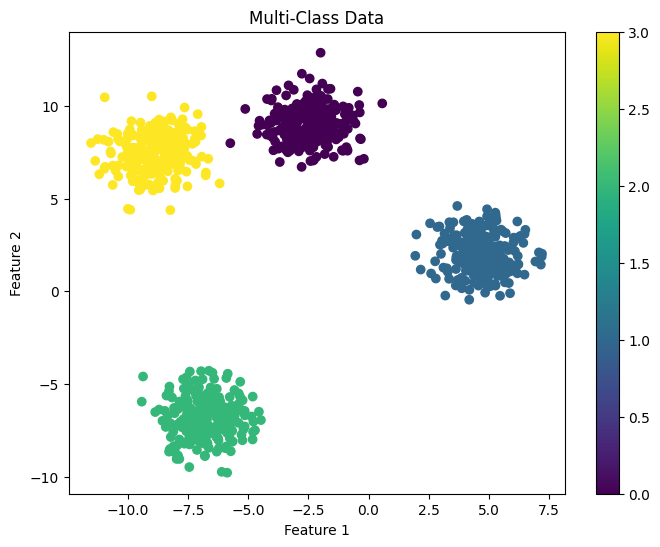

In [8]:
# Créer des données multi-classes avec make_blobs()
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualiser les données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Multi-Class Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

Comme les données sont générées à partir de plusieurs blobs avec des centres différents, une fonction non linéaire est nécessaire pour séparer ces classes.

In [9]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(2,)),
    Dense(50, activation='relu'),
    Dense(4, activation='softmax')
])

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 2s 32ms/step - loss: 0.6765 - accuracy: 0.8800 - val_loss: 0.3112 - val_accuracy: 1.0000
Epoch 2/20
25/25 [==============================] - 0s 13ms/step - loss: 0.2399 - accuracy: 0.9987 - val_loss: 0.1630 - val_accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 0s 12ms/step - loss: 0.1399 - accuracy: 0.9987 - val_loss: 0.1059 - val_accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0957 - accuracy: 0.9987 - val_loss: 0.0764 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0713 - accuracy: 0.9987 - val_loss: 0.0596 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0563 - accuracy: 0.9987 - val_loss: 0.0483 - val_accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0465 - accuracy: 0.9987 - val_loss: 0.0402 - val_accuracy: 1.0000
Epoch 8/20
25

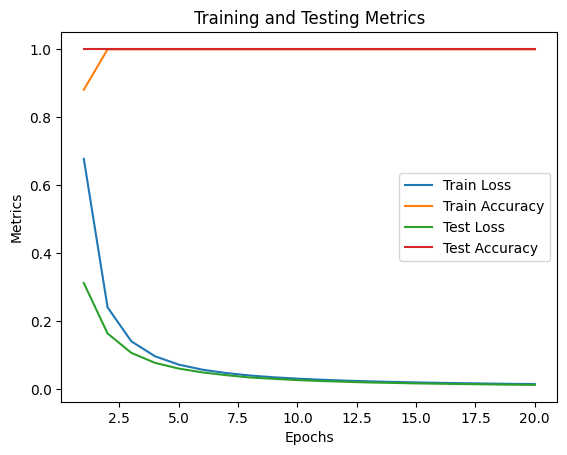

In [11]:
epochs = range(1, 21)
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history.history['val_loss'], label='Test Loss')
plt.plot(epochs, history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Testing Metrics')
plt.legend()
plt.show()